In [1]:
import time

import numpy as np
import skimage
from skimage import io
import scipy.ndimage
import higra as hg

import matplotlib.pyplot as plt

In [2]:
data = skimage.io.imread("/home/cyril/Documents/Data/LW4/LW4-600.tif")/255.0

In [3]:
data.shape, data.dtype, data.min(), data.max()

((600, 1394, 1832), dtype('float64'), 0.043137254901960784, 0.8901960784313725)

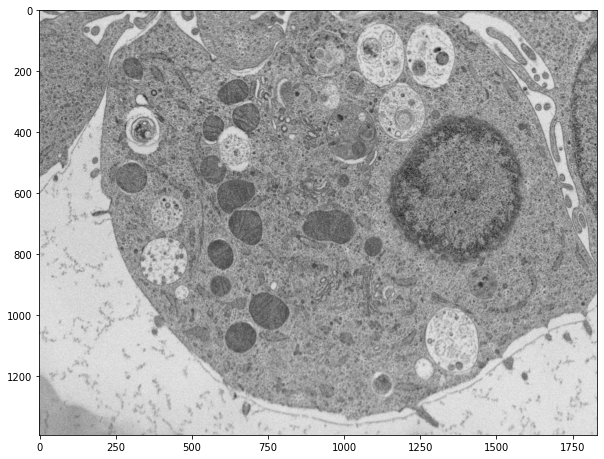

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(data[10], cmap="gray")
plt.show()

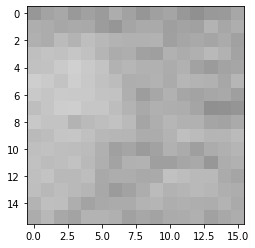

In [5]:
plt.imshow(data[0,0:16,0:16], cmap="gray", vmin=0, vmax=1)

In [6]:
def morphology(data_in, op=scipy.ndimage.grey_erosion, se=scipy.ndimage.generate_binary_structure(3, 1)):
    data_out = op(input=data_in, structure=se)
    return data_out

In [ ]:
# op = scipy.ndimage.grey_erosion
# op = scipy.ndimage.black_tophat
op = scipy.ndimage.white_tophat
# op = scipy.ndimage.morphological_gradient

se = scipy.ndimage.iterate_structure(scipy.ndimage.generate_binary_structure(3, 1), 3)

t0 = time.time()
# data_pp = morphology(data.astype(np.float32), op, se)
data_pp = morphology(data*255, op, se)/255.0

t1 = time.time()
print(t1-t0, "s")

In [ ]:
data_pp.shape, data_pp.dtype, data_pp.min(), data_pp.max()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(data_pp[10], cmap="gray")
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(data[10], cmap="gray")
plt.show()

In [ ]:
plt.imshow(data_pp[0,0:16,0:16], cmap="gray", vmin=0, vmax=1)

In [50]:
def connected_operators(image, arg_tree, arg_attr, arg_threshold):
    mask = [[[0, 0, 0], [0, 1, 0], [0, 0, 0]], [[0, 1, 0], [1, 0, 1], [0, 1, 0]], [[0, 0, 0], [0, 1, 0], [0, 0, 0]]]
    
    t0 = time.time()
    neighbours = hg.mask_2_neighbours(mask)
    t1 = time.time()
    print(t1 - t0, "s")
    
    t0 = time.time()
    graph = hg.get_nd_regular_graph(image.shape, neighbours)
    t1 = time.time()
    print(t1 - t0, "s")
    
    t0 = time.time()
    tree, altitudes = arg_tree(graph, image)
    t1 = time.time()
    print(t1 - t0, "s")
    
    t0 = time.time()
    attribute = arg_attr(tree)#, altitudes) # todo !
    t1 = time.time()
    print(t1 - t0, "s")
    
    t0 = time.time()
    deleted_nodes = attribute < arg_threshold
    t1 = time.time()
    print(t1 - t0, "s")
    
    return hg.reconstruct_leaf_data(tree, altitudes, deleted_nodes)

In [56]:
tree = hg.component_tree_max_tree
attr =  hg.attribute_area
# attr = lambda tree, altitudes: hg.attribute_area(tree)

threshold = 50000
data2 = data[0:8, :, :]

t0 = time.time()
data_pp = connected_operators(data2*255, tree, attr, 200)/255.0
t1 = time.time()
print(t1 - t0, "s")

0.00012731552124023438 s
11.170507431030273 s
17.786076307296753 s
0.48531246185302734 s
0.017637252807617188 s
30.37177872657776 s


In [57]:
data_pp.shape, data_pp.dtype, data_pp.min(), data_pp.max()

((8, 1394, 1832), dtype('float64'), 0.0784313725490196, 0.7450980392156863)

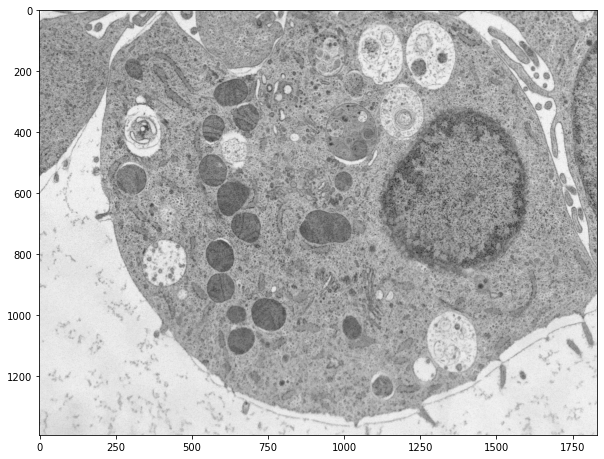

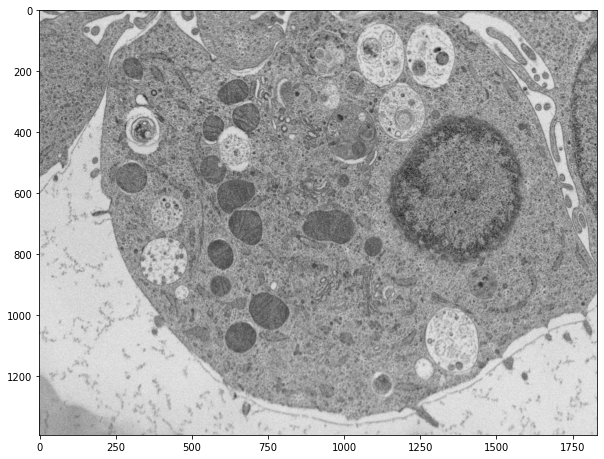

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(data_pp[0], cmap="gray")
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(data[10], cmap="gray")
plt.show()

In [ ]:
# op = hg.component_tree_min_tree
tree = hg.component_tree_max_tree

attr = lambda tree, altitudes: hg.attribute_area(tree),
# attr = lambda tree, altitudes: hg.attribute_height(tree, altitudes) * 4
# attr = lambda tree, altitudes: hg.attribute_compactness(tree) * 1000

threshold = 200


t0 = time.time()
data_pp = connected_operators(data*255, tree, attr, threshold)/255.0

t1 = time.time()
print(t1-t0, "s")